<a href="https://colab.research.google.com/github/aTom-Pie/DW_Matrix_Week_3/blob/master/Matrix3_Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

import os
import datetime

%load_ext tensorboard
from skimage import color, exposure
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score


# from collections import Counter

In [2]:
cd '/content/drive/My Drive/Colab Notebooks/Matrix3'

/content/drive/My Drive/Colab Notebooks/Matrix3


In [3]:
ls

data/  Matrix3_Day1.ipynb  Matrix3_Day3.ipynb
logs/  Matrix3_Day2.ipynb  Matrix3_Day4.ipynb


In [0]:
train = pd.read_pickle('data/train.p')
test  = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test,  y_test  = test['features'],  test['labels']

In [5]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [6]:
len(np.unique(y_train))

43

In [7]:
to_categorical(y_train) # zmiana na kategorie wektoryzacja

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
# czy y_train jest wektorem (zapisane jako kategotie)
# jesli nie kategoryzujemy danewejsciowe
# pozwala to na wielokrotne uruchomienie komórki bez obawy o zmiane danych 

if y_train.ndim == 1: y_train = to_categorical(y_train) 
y_train.shape

(34799, 43)

In [9]:
# czy y_test jest wektorem (zapisane jako kategotie)
# jesli nie kategoryzujemy danewejsciowe
# pozwala to na wielokrotne uruchomienie komórki bez obawy o zmiane danych 

if y_test.ndim == 1: y_test = to_categorical(y_test)
y_test.shape

(4410, 43)

In [10]:

input_shape = X_train.shape[1:] #pobieramy wymiar warttwy mamy (32px x 32px x 3 warstwy)
num_classes = y_train.shape[1]  # pobieramy ilość klas

input_shape, num_classes

((32, 32, 3), 43)

In [11]:
model = Sequential([
  Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape ),
  Flatten(),
  Dense(num_classes, activation='softmax')

])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 43)                2476843   
Total params: 2,478,635
Trainable params: 2,478,635
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='Adam', 
    metrics=['accuracy']
)

model.fit(X_train, y_train)

1088/1088 [==============================] - 5s 5ms/step - loss: 5.9222 - accuracy: 0.7863


In [13]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
  
  Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape ),
  
  Flatten(),
  
  Dense(num_classes, activation='softmax')
  ])

def train_model(model, X_train, y_train, params_fit={}):
  model.compile(
    loss='categorical_crossentropy', 
    optimizer='Adam', 
    metrics=['accuracy']
  )


  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train, 
      y_train,
      batch_size = params_fit.get('batch_size', 128), 
      epochs = params_fit.get('epochs', 5),
      verbose = params_fit.get('verbose', 1),
      validation_data = params_fit.get('validation_data', (X_train, y_train)),
      callbacks = [tensorboard_callback],
      )
  # return logdir
  return model

get_cnn_v1(input_shape, num_classes).summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
flatten_1 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 43)                2476843   
Total params: 2,478,635
Trainable params: 2,478,635
Non-trainable params: 0
_________________________________________________________________


In [14]:
model = get_cnn_v1(input_shape, num_classes)
# logdir = train_model(model, X_train, y_train) # orginalne
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 5s 18ms/step - loss: 26.3314 - accuracy: 0.7075 - val_loss: 0.2520 - val_accuracy: 0.9379
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2132 - accuracy: 0.9489 - val_loss: 0.1227 - val_accuracy: 0.9699
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1379 - accuracy: 0.9668 - val_loss: 0.1231 - val_accuracy: 0.9713
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1061 - accuracy: 0.9752 - val_loss: 0.0726 - val_accuracy: 0.9804
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.0735 - accuracy: 0.9820 - val_loss: 0.0706 - val_accuracy: 0.9841


In [15]:
y_pred_prob = model_trained.predict(X_test)
y_pred_prob # Prawdopodobieństwa wystepowania znaków  w Teście

array([[8.7822571e-10, 2.9958501e-03, 6.6432261e-01, ..., 4.9201608e-06,
        5.5865135e-06, 2.4161881e-04],
       [1.2140334e-09, 1.8123895e-03, 9.6329343e-01, ..., 3.9676382e-04,
        7.3568907e-09, 3.1118837e-04],
       [6.9259383e-11, 9.0298466e-03, 4.4275954e-01, ..., 1.0604491e-05,
        2.3315758e-04, 2.8610849e-04],
       ...,
       [1.3933203e-04, 8.0149975e-03, 1.2442886e-03, ..., 1.0300831e-05,
        3.1327188e-05, 1.1313342e-04],
       [6.4447662e-04, 2.2447111e-02, 4.7292165e-03, ..., 4.4026903e-05,
        2.3816228e-04, 1.7816466e-04],
       [3.5562829e-05, 2.3548270e-03, 3.5068593e-03, ..., 3.3297320e-06,
        1.5342306e-05, 6.6483211e-05]], dtype=float32)

In [0]:
# y_pred_prob[0] # Prawdopodobieństwa wystepowania 1 znaku z indeksem [0]

In [17]:
y_pred_prob[400] # Prawdopodobieństwa wystepowania 1 znaku z indeksem [400]

array([9.51981638e-03, 9.90474761e-01, 1.50396751e-10, 2.19008266e-23,
       5.45047351e-06, 2.73469389e-08, 3.79830548e-26, 1.63634420e-18,
       1.03812848e-28, 3.78534198e-20, 3.49413587e-25, 2.45787389e-21,
       7.78893857e-29, 3.80910528e-31, 7.46182599e-30, 1.93723741e-22,
       2.22967029e-22, 3.87175295e-36, 4.11572664e-20, 6.87112379e-35,
       1.48610261e-29, 5.91288167e-24, 8.31243018e-38, 6.34202524e-31,
       6.83915191e-32, 5.49544248e-29, 1.05244931e-24, 3.00253682e-29,
       4.62493341e-26, 1.21146595e-20, 1.29328079e-32, 1.93784393e-29,
       1.48925831e-36, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.09748535e-30], dtype=float32)

In [18]:
print(np.sum([1.84665911e-03, 8.61545265e-01, 1.23906585e-09, 1.83554852e-14,
       1.36608064e-01, 2.12584467e-14, 1.27968951e-30, 4.78253341e-20,
       1.03265195e-19, 5.33624967e-12, 5.12377840e-17, 3.75612446e-16,
       1.55545490e-11, 1.83544999e-22, 1.13281481e-26, 1.48389333e-16,
       3.92642652e-16, 6.00181406e-23, 3.88490083e-25, 6.87414327e-28,
       2.52155508e-20, 3.01276434e-20, 2.83419441e-28, 4.70811121e-23,
       1.14984645e-19, 1.53596734e-26, 2.82469116e-13, 8.41751756e-30,
       8.73757896e-17, 2.29264092e-17, 0.00000000e+00, 6.10952211e-25,
       3.28338854e-27, 5.88994338e-33, 0.00000000e+00, 8.96511704e-23,
       2.23986525e-32, 1.69934824e-36, 1.84646524e-33, 0.00000000e+00,
       4.71995776e-32, 9.74057486e-29, 8.50715489e-24]))

np.sum(y_pred_prob[400])

# prawdopodobieństwa sumują się do 1 (braki to błędy zaokrąglenia)

0.9999999893702798


1.0

In [19]:
df = pd.read_csv('data/signnames.csv')
labels_dic = df.to_dict()['b']
labels_dic

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

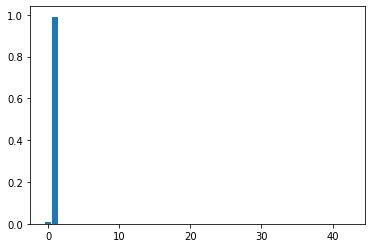

In [20]:
plt.bar(range(43),y_pred_prob[400]);

Object `.imshow` not found.


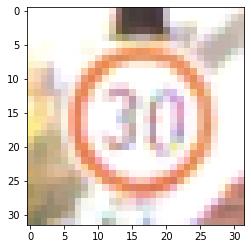

In [21]:
?.imshow(X_test[0]); #podgląd znaku [0]
plt.imshow(X_test[400]); #podgląd znaku [400]

In [22]:
np.argmax( y_pred_prob[400] ) #podaje pozycje w indeksie tablicy najwyższej wartości 

1

In [23]:
labels_dic[ np.argmax( y_pred_prob[400] ) ] #sprawdza nazwę w słowniku
# u mnie jest ok

'Speed limit (30km/h)'

In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):

  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)

In [25]:
predict(model_trained, X_test, y_test)

0.8360544217687075

In [26]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

predict(model_trained, X_test, y_test)

Epoch 1/5
272/272 [==============================] - 5s 18ms/step - loss: 13.4923 - accuracy: 0.7271 - val_loss: 0.3168 - val_accuracy: 0.9289
Epoch 2/5
272/272 [==============================] - 5s 18ms/step - loss: 0.2230 - accuracy: 0.9480 - val_loss: 0.1441 - val_accuracy: 0.9687
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1423 - accuracy: 0.9674 - val_loss: 0.1167 - val_accuracy: 0.9753
Epoch 4/5
272/272 [==============================] - 5s 18ms/step - loss: 0.1483 - accuracy: 0.9675 - val_loss: 0.1963 - val_accuracy: 0.9531
Epoch 5/5
272/272 [==============================] - 5s 18ms/step - loss: 0.0992 - accuracy: 0.9766 - val_loss: 0.0568 - val_accuracy: 0.9847


0.8385487528344672

In [28]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
  
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape ),
  MaxPool2D(),
  Dropout(0.3),

  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Flatten(),

  Dense(1024, activation='relu'),
  Dropout(0.5),

  Dense(num_classes, activation='softmax')
  ])

# get_cnn_v2(input_shape, num_classes).summary()

train_and_predict(get_cnn_v2(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 15ms/step - loss: 6.8304 - accuracy: 0.0913 - val_loss: 2.9811 - val_accuracy: 0.1972
Epoch 2/5
272/272 [==============================] - 4s 14ms/step - loss: 2.6375 - accuracy: 0.2797 - val_loss: 1.8686 - val_accuracy: 0.4953
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 1.6821 - accuracy: 0.5080 - val_loss: 0.9254 - val_accuracy: 0.7423
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 1.0510 - accuracy: 0.6816 - val_loss: 0.4289 - val_accuracy: 0.8928
Epoch 5/5
272/272 [==============================] - 4s 14ms/step - loss: 0.7041 - accuracy: 0.7828 - val_loss: 0.2377 - val_accuracy: 0.9437


0.8564625850340136

In [29]:

def get_cnn_v1(input_shape, num_classes):
  return Sequential([
  Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape ),
  Flatten(),
  Dense(num_classes, activation='softmax')
  ])

def train_and_predict (model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

train_and_predict(get_cnn_v2(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 15ms/step - loss: 4.0165 - accuracy: 0.3366 - val_loss: 0.9980 - val_accuracy: 0.7473
Epoch 2/5
272/272 [==============================] - 4s 14ms/step - loss: 0.9770 - accuracy: 0.7145 - val_loss: 0.2856 - val_accuracy: 0.9328
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.5535 - accuracy: 0.8380 - val_loss: 0.1619 - val_accuracy: 0.9701
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 0.3883 - accuracy: 0.8859 - val_loss: 0.0863 - val_accuracy: 0.9828
Epoch 5/5
272/272 [==============================] - 4s 14ms/step - loss: 0.3023 - accuracy: 0.9112 - val_loss: 0.0659 - val_accuracy: 0.9873


0.916780045351474

In [30]:
model = get_cnn_v2(input_shape, num_classes)
params_fit = {
    'epochs' : 7
}

train_model(model, X_train, y_train, params_fit)

Epoch 1/7
272/272 [==============================] - 4s 14ms/step - loss: 5.6975 - accuracy: 0.2414 - val_loss: 1.8652 - val_accuracy: 0.4927
Epoch 2/7
272/272 [==============================] - 4s 14ms/step - loss: 1.5352 - accuracy: 0.5382 - val_loss: 0.6910 - val_accuracy: 0.8216
Epoch 3/7
272/272 [==============================] - 4s 14ms/step - loss: 0.8021 - accuracy: 0.7543 - val_loss: 0.2857 - val_accuracy: 0.9370
Epoch 4/7
272/272 [==============================] - 4s 14ms/step - loss: 0.5054 - accuracy: 0.8427 - val_loss: 0.1529 - val_accuracy: 0.9722
Epoch 5/7
272/272 [==============================] - 4s 14ms/step - loss: 0.3778 - accuracy: 0.8835 - val_loss: 0.1186 - val_accuracy: 0.9809
Epoch 6/7
272/272 [==============================] - 4s 14ms/step - loss: 0.2947 - accuracy: 0.9102 - val_loss: 0.0645 - val_accuracy: 0.9894
Epoch 7/7
272/272 [==============================] - 4s 14ms/step - loss: 0.2563 - accuracy: 0.9230 - val_loss: 0.0507 - val_accuracy: 0.9902


In [31]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
  
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape ),
  Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Flatten(),

  Dense(1024, activation='relu'),
  Dropout(0.5),

  Dense(num_classes, activation='softmax')
  ])

# get_cnn_v2(input_shape, num_classes).summary()

train_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 5s 20ms/step - loss: 2.0949 - accuracy: 0.5496 - val_loss: 0.2807 - val_accuracy: 0.9485
Epoch 2/5
272/272 [==============================] - 5s 19ms/step - loss: 0.4101 - accuracy: 0.8839 - val_loss: 0.0702 - val_accuracy: 0.9836
Epoch 3/5
272/272 [==============================] - 5s 19ms/step - loss: 0.2331 - accuracy: 0.9346 - val_loss: 0.0511 - val_accuracy: 0.9884
Epoch 4/5
272/272 [==============================] - 5s 19ms/step - loss: 0.1696 - accuracy: 0.9521 - val_loss: 0.0236 - val_accuracy: 0.9947
Epoch 5/5
272/272 [==============================] - 5s 19ms/step - loss: 0.1285 - accuracy: 0.9628 - val_loss: 0.0198 - val_accuracy: 0.9954


0.9718820861678005

In [32]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
  
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape ),
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
  MaxPool2D(),
  Dropout(0.3),

  Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Flatten(),

  Dense(1024, activation='relu'),
  Dropout(0.5),

  Dense(num_classes, activation='softmax')
  ])

# get_cnn_v2(input_shape, num_classes).summary()

train_and_predict(get_cnn_v4(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 6s 23ms/step - loss: 3.1392 - accuracy: 0.1889 - val_loss: 1.3941 - val_accuracy: 0.5762
Epoch 2/5
272/272 [==============================] - 6s 22ms/step - loss: 1.2218 - accuracy: 0.6211 - val_loss: 0.4274 - val_accuracy: 0.8788
Epoch 3/5
272/272 [==============================] - 6s 22ms/step - loss: 0.5954 - accuracy: 0.8162 - val_loss: 0.1641 - val_accuracy: 0.9574
Epoch 4/5
272/272 [==============================] - 6s 21ms/step - loss: 0.3727 - accuracy: 0.8859 - val_loss: 0.0865 - val_accuracy: 0.9775
Epoch 5/5
272/272 [==============================] - 6s 22ms/step - loss: 0.2791 - accuracy: 0.9150 - val_loss: 0.0612 - val_accuracy: 0.9818


0.9532879818594104

In [33]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
  
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape ),
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
  MaxPool2D(),
  Dropout(0.3),

  Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Flatten(),

  Dense(1024, activation='relu'),
  Dropout(0.5),
  
  Dense(1024, activation='relu'),
  Dropout(0.5),

  Dense(num_classes, activation='softmax')
  ])

# get_cnn_v2(input_shape, num_classes).summary()

train_and_predict(get_cnn_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 6s 24ms/step - loss: 2.9508 - accuracy: 0.2133 - val_loss: 1.5490 - val_accuracy: 0.4819
Epoch 2/5
272/272 [==============================] - 6s 23ms/step - loss: 1.2913 - accuracy: 0.5780 - val_loss: 0.4428 - val_accuracy: 0.8500
Epoch 3/5
272/272 [==============================] - 6s 22ms/step - loss: 0.5839 - accuracy: 0.8099 - val_loss: 0.1694 - val_accuracy: 0.9447
Epoch 4/5
272/272 [==============================] - 6s 24ms/step - loss: 0.3401 - accuracy: 0.8964 - val_loss: 0.0769 - val_accuracy: 0.9760
Epoch 5/5
272/272 [==============================] - 6s 22ms/step - loss: 0.2470 - accuracy: 0.9274 - val_loss: 0.0582 - val_accuracy: 0.9831


0.9469387755102041

In [34]:
X_train[0].shape

(32, 32, 3)

In [35]:
color.rgb2gray(X_train[0]).shape

(32, 32)

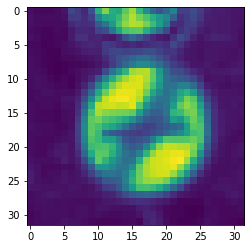

In [36]:
plt.imshow(color.rgb2gray(X_train[0]));

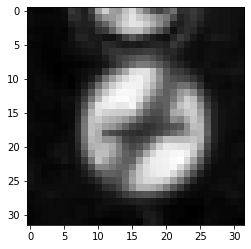

In [37]:
plt.imshow(color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'));

In [38]:
color.rgb2gray(X_train).shape

(34799, 32, 32)

In [42]:
# X_train_gray = color.rgb2gray(X_train).shape
# X_test_gray = color.rgb2gray(X_test).shape
# X_train_grey , X_test_gray


X_train_gray = color.rgb2gray( X_train ).reshape(-1,32,32,1)
X_test_gray  = color.rgb2gray( X_test ).reshape(-1,32,32,1)


X_train_gray.shape, X_test_gray.shape

((34799, 32, 32, 1), (4410, 32, 32, 1))

In [46]:
model = get_cnn_v5((32, 32, 1), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 6s 24ms/step - loss: 2.8506 - accuracy: 0.2029 - val_loss: 0.9356 - val_accuracy: 0.7110
Epoch 2/5
272/272 [==============================] - 6s 23ms/step - loss: 0.6336 - accuracy: 0.7949 - val_loss: 0.1727 - val_accuracy: 0.9471
Epoch 3/5
272/272 [==============================] - 6s 23ms/step - loss: 0.2591 - accuracy: 0.9163 - val_loss: 0.0584 - val_accuracy: 0.9812
Epoch 4/5
272/272 [==============================] - 6s 23ms/step - loss: 0.1697 - accuracy: 0.9455 - val_loss: 0.0379 - val_accuracy: 0.9898
Epoch 5/5
272/272 [==============================] - 6s 23ms/step - loss: 0.1330 - accuracy: 0.9588 - val_loss: 0.0277 - val_accuracy: 0.9924


0.9691609977324263